# PPO Discrete in Cart Pole Environment

In [1]:
import gymnasium as gym

from rlforge.agents.policy_gradient import PPODiscrete
from rlforge.experiments import ExperimentRunner

In [2]:
num_envs = 8
envs = gym.make_vec("CartPole-v1", num_envs=num_envs, vectorization_mode="async")

agent = PPODiscrete(
    state_dim=envs.observation_space.shape[1],  
    num_actions=envs.action_space[0].n,       
    actor_lr=0.0003,
    critic_lr=0.002,
    discount=0.99,
    clip_epsilon=0.2,
    network_architecture=[64,64],
    update_epochs=10,
    mini_batch_size=64,
    rollout_length=1024,
    value_coef=0.5,
    entropy_coeff=0.01,
    gae_lambda=0.95,
    device='cpu'
)

In [3]:
runner = ExperimentRunner(envs, agent)

results = runner.run_episodic_batch(
    num_runs=5,
    num_episodes=500,
    max_steps_per_episode=None
)

rewards = results["rewards"]

runner.summary(last_n=20)

 Experiment Summary (Episodic)
Runs: 5
Average runtime per run: 95.912 seconds
Episodes per run (Max): 500
First episode mean reward: 14.400
Last episode mean reward: 450.200
Overall mean reward: 316.242
Mean reward (last 20 episodes): 472.030
First episode mean steps: 14.4
Last episode mean steps: 451.2
Overall mean steps: 317.2


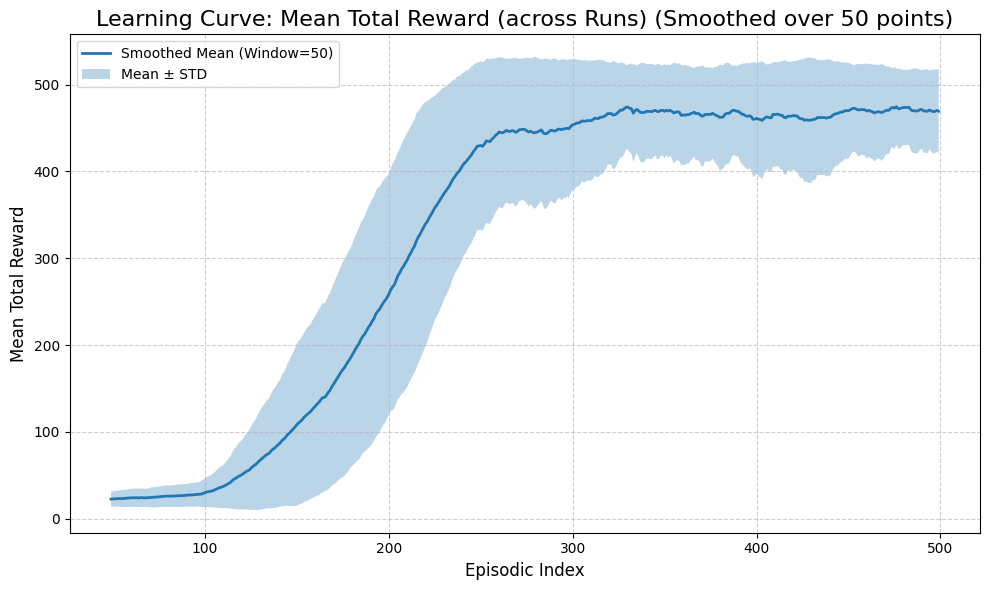

In [4]:
runner.plot_results()